# **1. Company Background**

AWS (Amazon Web Services) is the global leader in cloud computing. It enables organizations to build, run, and scale applications in the cloud using secure, scalable, and highly available infrastructure — without managing physical hardware. Businesses across industries depend on AWS services to accelerate digital transformation, improve operational efficiency, and reduce technology costs.

One of the fastest-growing areas within AWS is its Software-as-a-Service (SaaS) business. Instead of selling physical products, AWS provides software solutions through recurring subscriptions to business customers. This B2B approach generates steady revenue and encourages deeper customer engagement with AWS cloud resources.

As AWS expands its SaaS offerings and reaches more enterprise customers, data-driven insights become essential. Understanding customer behavior, subscription performance, and product profitability supports better decision-making — from sales strategy and marketing execution to partner investment and long-term growth planning.

# **2. Problems Finding**

Over the past four years, AWS SaaS has shown significant fluctuations in both sales and profitability. Transaction values range from just a few dollars to over $23 million, yet profit performance remains inconsistent — including several cases of negative profit, particularly in transactions with high discount rates. These irregularities indicate inefficiencies in pricing and discount strategies. While discounts are commonly used to boost sales volume, the data suggests that in certain cases, they may actually reduce profitability instead.

Hence, this analysis focuses on understanding **why negative profit transactions occur and how AWS SaaS can optimize its discount and pricing policy to achieve sustainable growth.**

To address this, the following areas of analysis were defined:  

**Scopes of Analysis**

**1. Product Performance Analysis**   
- Which products generate the highest sales and profit?  
- Do the most sold products give the highest sales and profit?  
- Which products have strong margin efficiency?  

**2. Discount Impact Analysis**  
- Do discounts help increase sales, or do they reduce profitability?  
- At what discount level does profit start to drop sharply?  

**3. Time Series Analysis**  
- How have sales and profit changed over the past four years?  
- Which year has the highest performance?  

**4. Regional Analysis**  
- Which country show the strongest and weakest financial performance?  
- Country x Discount x Profit

**5. Customer Segment Analysis**   
- Which customer segments contribute the most to sales and profit?   

**6. Negative Profit Check**   
- How many transactions result in negative profit, and why does it occur?   
- Does discount was the reason or is there any other reasons behind it?  

**7. High Discount Transaction Analysis**    
- What is the impact of transactions with discounts greater than 50%?

# **3. Data**

**Import Libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, pearsonr, spearmanr, shapiro

The dataset provides comprehensive details of the company’s cashflow and transactional performance across three years. Each record represents a unique transaction and includes key attributes such as:  

1. Row ID: A unique identifier for each transaction.  
2. Order ID: A unique identifier for each order.  
3. Order Date: The date when the order was placed.  
4. Date Key: A numerical representation of the order date (YYYYMMDD).  
5. Contact Name: The name of the person who placed the order.  
6. Country: The country where the order was placed.  
7. City: The city where the order was placed.  
8. Region: The region where the order was placed.  
9. Subregion: The subregion where the order was placed.  
10. Customer: The name of the company that placed the order.  
11. Customer ID: A unique identifier for each customer.  
12. Industry: The industry the customer belongs to.  
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).  
14. Product: The product was ordered.  
15. License: The license key for the product.  
16. Sales: The total sales amount for the transaction.  
17. Quantity: The total number of items in the transaction.  
18. Discount: The discount applied to the transaction.  
19. Profit: The profit from the transaction.  

Here is the top and bottom 5 lines from this dataset:  

In [33]:
# Load the data fresh
sales = pd.read_csv('SaaS-Sales.csv', sep=',') # ini buat hapus delimiternya. sep means separator.
display(sales.head(),sales.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# **4. Data Understanding and Cleaning**

Before moving forward with the analysis, it is essential to understand and prepare the dataset. Through this process, we can identify and address any anomalies or inconsistencies, ensuring that our findings are based on accurate and reliable data.

##### **4.1 Data Information**

In [34]:
print(f'Total rows in SaaS Sales Dataset {sales.shape}')
sales.info()

Total rows in SaaS Sales Dataset (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null

In [35]:
# Find NaN Values
display(sales.isna().sum()/len(sales)*100)

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [36]:
# Check if there are duplicate License values
sales['License'].duplicated().sum()

np.int64(0)

In [37]:
# Describe the dataset
display(sales.describe(), sales.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [38]:
# Unique and Nunique Check
pd.set_option('display.max_colwidth', None)  # Use None instead of -1 for unlimited width
# data uni di tiap kolom
listItem = []
for col in sales.columns :
    listItem.append( [col, sales[col].nunique(), sales[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

In [39]:
# Check wether Customer has the same number of unique values as Customer ID

total_customer = sales['Customer'].value_counts().count()
total_customer

np.int64(99)

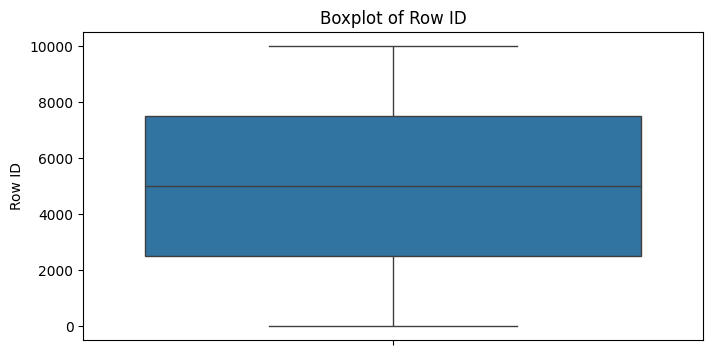

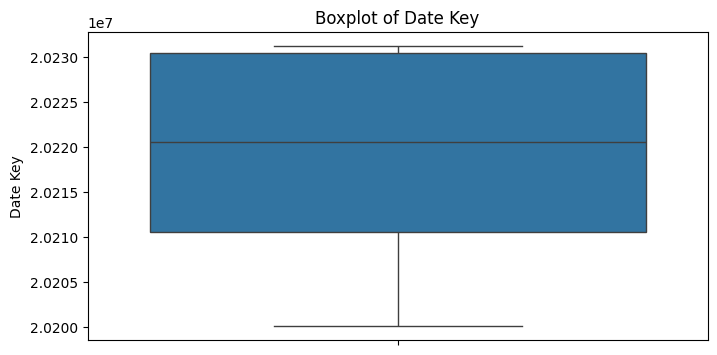

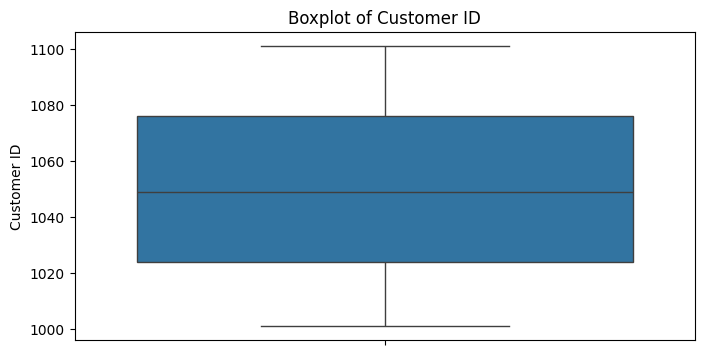

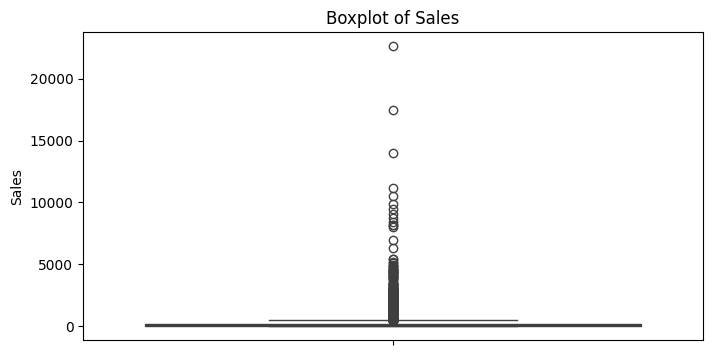

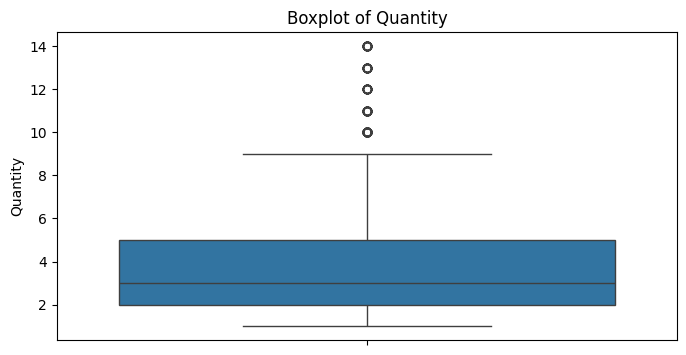

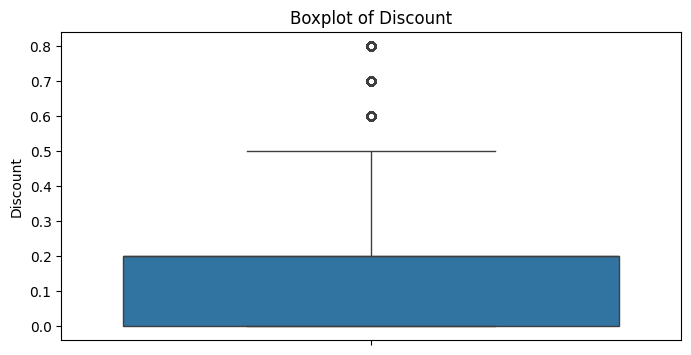

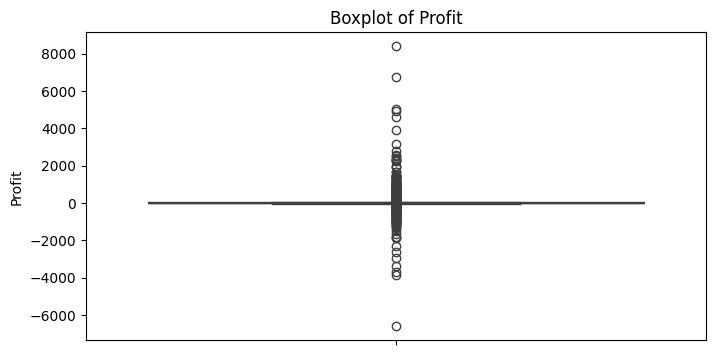

Sales Column has Outliers
Quantity Column has Outliers
Discount Column has Outliers
Profit Column has Outliers


In [40]:
# Check outliers in numeric columns using boxplots
s_cols = sales.select_dtypes(include=['float64', 'int64']).columns

for col in s_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=sales[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Use IQR to find outliers

q_cols = sales.select_dtypes(include=['float64', 'int64']).columns

for col in q_cols:
    Q1 = sales[col].quantile(0.25)
    Q3 = sales[col].quantile(0.75)
    IQR = Q3 -Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = sales[(sales[col] < lower) | (sales[col] > upper)]
    
    if len(outliers) > 0:
        print(f'{col} Column has Outliers')

**Key Findings**

1. The dataset contains 19 columns and 9,994 rows, though additional columns may be added in future updates  
2. There are no missing values in the dataset  
3. The `License` column contains a unique code for each transaction, with no duplicates detected — making it a potential transaction identifier  
4. The `Customer` and `Customer ID` columns share identical record counts, suggesting that each customer may have conducted multiple transactions  
5. The `Order Date` column is stored as an object data type instead of datetime, and the date format shows certain inconsistencies  
6. Columns such as `Contact Name`, `City`, and `Country` require standardization to remove irregular characters and ensure consistency  
7. Both `Sales` and `Profit` columns also require standardization — this includes removing unwanted symbols and converting their data type from object to float  
8. The` Customer ID `column will be formatted as an object, and `Row ID` will be set as the dataset index  
9. A new column, `Profit Margin`, will be added to calculate the profit ratio for each transaction  
10. Outliers were detected in several numerical columns — specifically in `Sales`, `Quantity`, `Discount`, `Profit`

##### **4.2 Data Cleaning**

In [41]:
# Convert Data Types Date Key to Datetime

sales['Date Key'] = pd.to_datetime(sales['Date Key'], format='%Y%m%d', errors='coerce')

# ini %Y nya gede karna formatnya 4 angka tahun, tp kl cuma 2 angka aja jd kecil gt kaya %y

# Change back to int YYYYMMDD format

sales['Date Key'] = sales['Date Key'].dt.strftime('%Y%m%d').astype(int)

In [42]:
# Timeline of the Dataset
sales['Order Date'].min(), sales['Order Date'].max()

('1/1/2023', '9/9/2023')

In [43]:
# Convert Data Inconsistency in 'Order Date' column

def convert_od(date):
    day, month, year = date.split('/')
    if day.isdigit() and month.isdigit() and year.isdigit():
        if int(day) > 12:
            return f"{month}/{day}/{year}"
        return date
    
# Apply the function to the 'Order Date' column

sales['Order Date'] = sales['Order Date'].apply(convert_od)

# Convert 'Order Date' column to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y', errors='coerce')

In [44]:
# Standardize Column Names

sales['Contact Name'] = sales['Contact Name'].str.title().str.strip()
sales['City'] = sales['City'].str.title().str.strip()
sales['Country'] = sales['Country'].str.title().str.strip()

While inspecting numeric columns, it was found that both Sales and Profit contain inconsistent decimal precision — ranging from one to four digits after the decimal point.
This indicates potential differences in rounding or data source formatting. To ensure consistent aggregation and visualization, all monetary values were standardized to two decimal places.

In [45]:
# Standarize Sales and Profit 

sales['Sales'] = sales['Sales'].round(2)
sales['Profit'] = sales['Profit'].round(2)

In [46]:
# Forecasting Customer ID to String
sales['Customer ID'] = sales['Customer ID'].astype(str)

# Forecasting Row ID to Index
sales.set_index('Row ID', inplace=True)

In [47]:
# Add New Columns 'Profit Margin' 
sales['Profit Margin'] = ((sales['Profit'] / sales['Sales']) * 100).round(2)

In [48]:
print('Clean Dataset: ')
display(sales.head(),sales.tail())

# NewInfo
listItem = []
for col in sales.columns :
    listItem.append([col, sales[col].dtype, sales[col].isna().sum(),
                    sales[col].nunique(), list(sales[col].sample(2).values)]);

Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print('New Info from Clean Dataset: ')
print(sales.shape)
Desc

Clean Dataset: 


,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
Row ID,,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.00,41.91,16.00
2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.00,219.58,30.00
3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.00,6.87,46.99
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.58,5,0.45,-383.03,-40.00
5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.37,2,0.20,2.52,11.27


,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
Row ID,,,,,,,,,,,,,,,,,,,
9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.25,3,0.2,4.10,16.24
9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.96,2,0.0,15.63,17.00
9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.58,2,0.2,19.39,7.50
9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.60,4,0.0,13.32,45.00
9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.16,2,0.0,72.95,30.00


New Info from Clean Dataset: 
(9994, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[AMER-2021-166338, EMEA-2021-166975]"
1,Order Date,datetime64[ns],0,1237,"[2021-04-18T00:00:00.000000000, 2021-12-25T00:00:00.000000000]"
2,Date Key,int64,0,1237,"[20201118, 20230604]"
3,Contact Name,object,0,793,"[Zoe Hodges, Felicity King]"
4,Country,object,0,48,"[United States, United States]"
5,City,object,0,262,"[Paris, Johannesburg]"
6,Region,object,0,3,"[AMER, EMEA]"
7,Subregion,object,0,12,"[NAMER, APAC]"
8,Customer,object,0,99,"[Valero Energy, Bosch]"
9,Customer ID,object,0,99,"[1036, 1001]"


In [49]:
sales.dtypes

Order ID                 object
Order Date       datetime64[ns]
Date Key                  int64
Contact Name             object
Country                  object
City                     object
Region                   object
Subregion                object
Customer                 object
Customer ID              object
Industry                 object
Segment                  object
Product                  object
License                  object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Profit Margin           float64
dtype: object

In [50]:
sales

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
Row ID,,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.00,41.91,16.00
2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.00,219.58,30.00
3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.00,6.87,46.99
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.58,5,0.45,-383.03,-40.00
5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.37,2,0.20,2.52,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.25,3,0.20,4.10,16.24
9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.96,2,0.00,15.63,17.00
9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.58,2,0.20,19.39,7.50


**Save Cleaned Dataset**

In [51]:
sales.to_csv(
    "sales_clean.csv",
    index=False,
    sep=';',
    encoding='utf-8-sig',
    float_format='%.2f'
)

# **5. Data Analysis**

As we have completed the data cleaning process, we will now deep-dive into the dataset to explore and answer several key questions derived from the identified business problems.

In [52]:
# Currency Formatting
def currency(x):
    return f"${x:,.2f}"

# Percentage Formatting
def percentage(x):
    return f"{x:,.2f}%"

In [53]:
# Min Max Sales and Profit with Currency Format

min_sales = sales['Sales'].min()
min_profit = sales['Profit'].min()
max_sales = sales['Sales'].max()
max_profit = sales['Profit'].max()

values = pd.Series([min_sales, max_sales, min_profit, max_profit]).apply(currency) #change it to series to apply the function.

info = pd.DataFrame({
    'Metrics': ['Lowest Sales', 'Highest Sales','Lowest Profit', 'Highest Profit'],
    'Values': values
})

info

,Metrics,Values
0,Lowest Sales,$0.44
1,Highest Sales,"$22,638.48"
2,Lowest Profit,"$-6,599.98"
3,Highest Profit,"$8,399.98"


##### **5.1 Product Performance Analysis**   
- Which products generate the highest sales and profit?  
- Do the most sold products give the highest sales and profit?  
- Which products have strong margin efficiency?  

In [54]:
# Groupby Product to see overall product performance
performance = sales.groupby('Product').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean'
}).reset_index()

performance

,Product,Quantity,Sales,Profit,Profit Margin
0,Alchemy,234,149528.01,55617.88,31.719265
1,Big Ol Database,440,189238.60,3384.72,-7.203043
2,ChatBot Plugin,3000,27118.80,6527.84,25.165364
3,ContactMatcher,7215,410378.21,12495.91,-19.062834
4,Data Smasher,2976,167380.31,41936.78,21.821690
5,FinanceHub,3756,340935.40,32136.26,18.702151
6,Marketing Suite,868,114879.98,-3472.59,-12.664035
7,Marketing Suite - Gold,3158,223843.59,21278.90,8.911761
8,OneView,1729,107532.14,18137.99,-15.696180
9,SaaS Connector Pack,3563,91705.12,13059.18,13.706405


**Top 5 by Quantity**

In [55]:
most_sold = performance.sort_values(by='Quantity', ascending=False)[['Product', 'Quantity']].reset_index(drop=True)
most_sold.head(5)

,Product,Quantity
0,ContactMatcher,7215
1,Support,5825
2,FinanceHub,3756
3,SaaS Connector Pack,3563
4,Site Analytics,3289


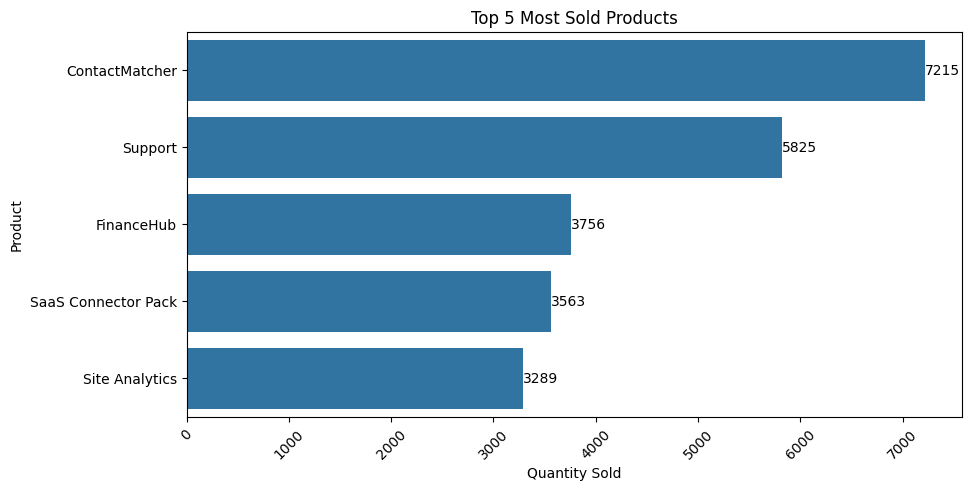

In [81]:
# Visualize Top 5 Most Sold Products
plt.figure(figsize=(10,5))
bar_plot= sns.barplot(data=most_sold.head(5), x='Quantity', y='Product')
for i in bar_plot.containers:
    bar_plot.bar_label(i)
plt.title('Top 5 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.show()

**Top 5 Products by Sales**

In [57]:
most_sold_sales = performance.sort_values(by='Sales', ascending=False)[['Product', 'Sales']].reset_index(drop=True)
most_sold_sales.head(5)

,Product,Sales
0,ContactMatcher,410378.21
1,FinanceHub,340935.40
2,Site Analytics,330007.10
3,Marketing Suite - Gold,223843.59
4,Big Ol Database,189238.60


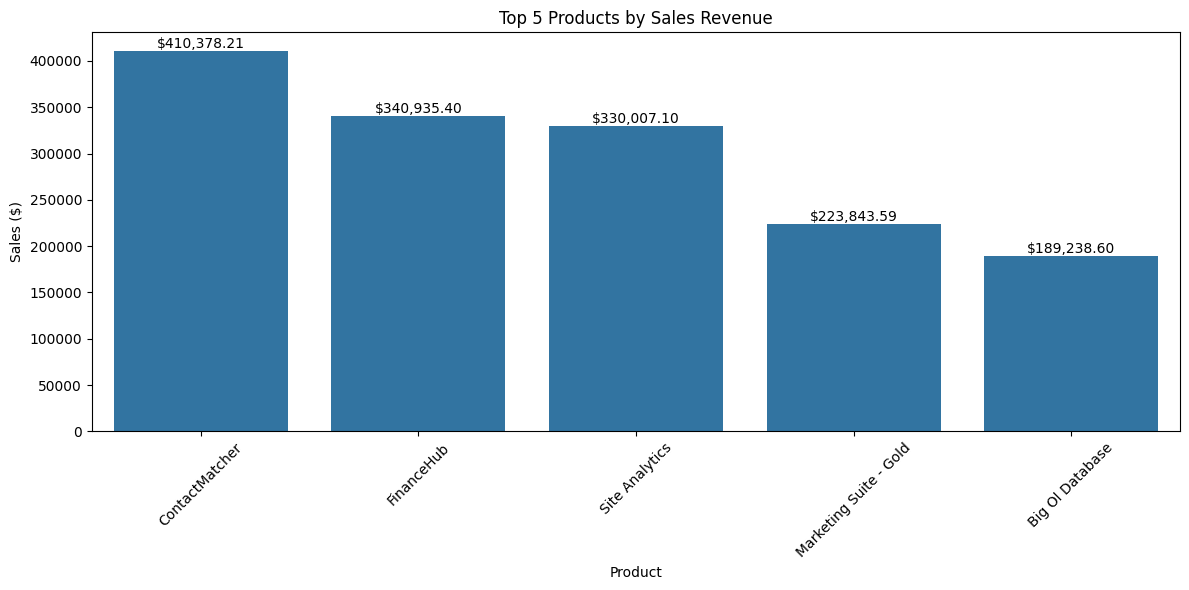

In [58]:
# Visualize Top 5 Products by Sales
plt.figure(figsize=(12,6))
bar_plot = sns.barplot(data=most_sold_sales.head(), x='Product', y='Sales')

# Add formatted labels with thousand separators
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt=lambda x: f'${x:,.2f}')  # Format with commas and 2 decimal places

plt.title('Top 5 Products by Sales Revenue')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

**Top 5 by Profit**

In [59]:
most_sold_profit = performance.sort_values(by='Profit', ascending=False)[['Product', 'Profit']].reset_index(drop=True)
most_sold_profit.head(5)     

,Product,Profit
0,Alchemy,55617.88
1,Site Analytics,44516.06
2,Data Smasher,41936.78
3,Support,32864.03
4,FinanceHub,32136.26


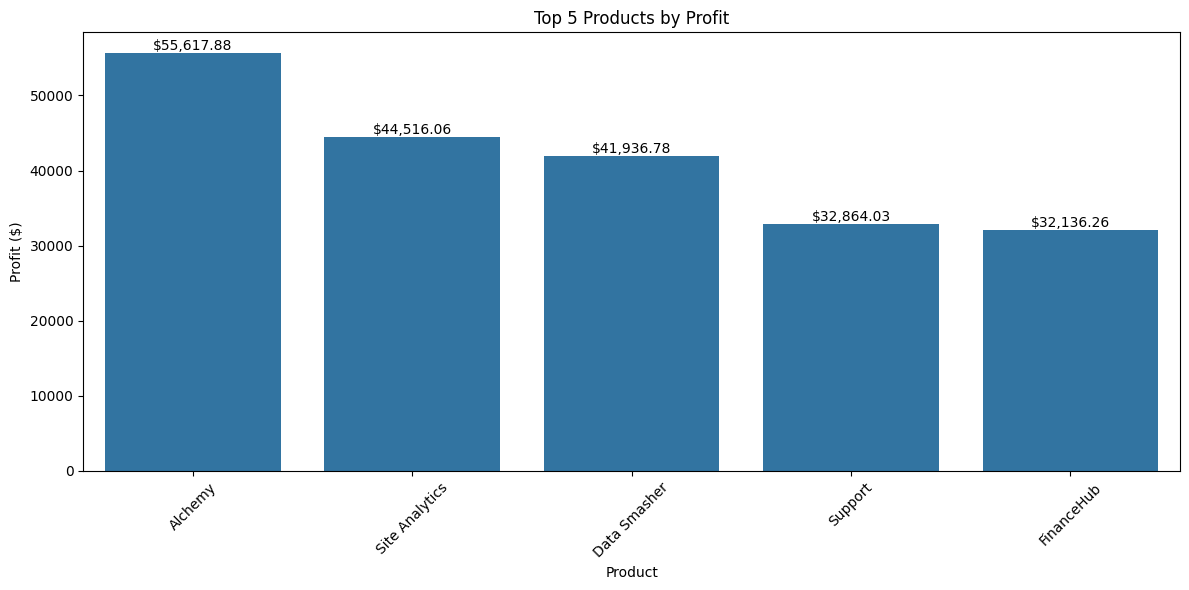

In [60]:
# Visualize Top 5 Products by Profit
plt.figure(figsize=(12,6))
bar_plot = sns.barplot(data=most_sold_profit.head(), x='Product', y='Profit')

# Add formatted labels with thousand separators
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt=lambda x: f'${x:,.2f}')  # Format with commas and 2 decimal places

plt.title('Top 5 Products by Profit')
plt.xlabel('Product')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

**Product Comparison: Do the Most Sold Products Generate High Profit?**

In [61]:
overall = performance.sort_values(by='Quantity', ascending=False).reset_index(drop=True)

# To make the dataset easier to read, we will format the Sales and Profit columns to currency format and Profit Margin to percentage format.
overall['Sales'] = overall['Sales'].apply(currency) # apply currency function
overall['Profit'] = overall['Profit'].apply(currency)
overall['Profit Margin'] = overall['Profit Margin'].apply(percentage)

overall.head(5)

,Product,Quantity,Sales,Profit,Profit Margin
0,ContactMatcher,7215,"$410,378.21","$12,495.91",-19.06%
1,Support,5825,"$125,152.76","$32,864.03",38.74%
2,FinanceHub,3756,"$340,935.40","$32,136.26",18.70%
3,SaaS Connector Pack,3563,"$91,705.12","$13,059.18",13.71%
4,Site Analytics,3289,"$330,007.10","$44,516.06",11.92%


In [62]:
sales[['Quantity', 'Sales', 'Profit']].corr()

,Quantity,Sales,Profit
Quantity,1.000000,0.200795,0.066253
Sales,0.200795,1.000000,0.479065
Profit,0.066253,0.479065,1.000000


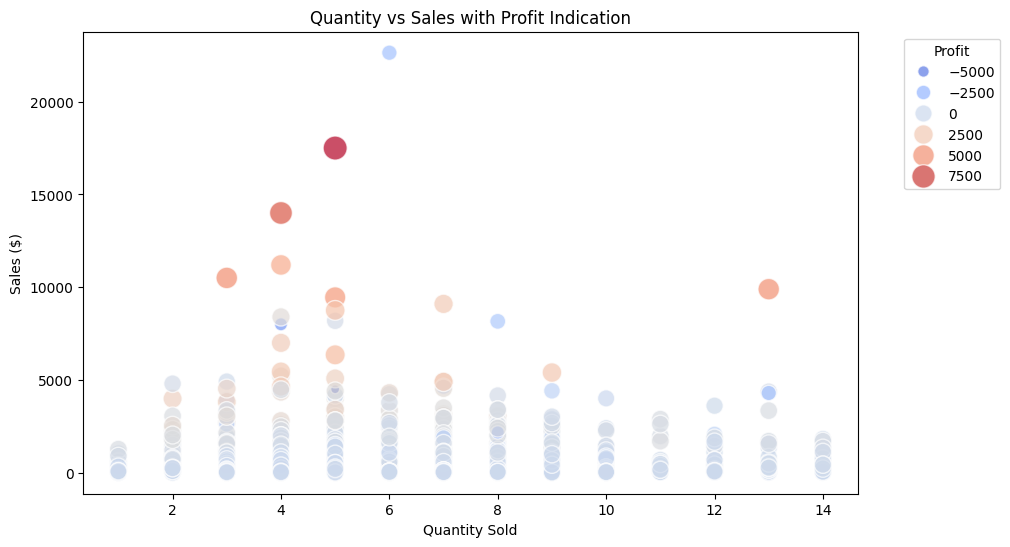

In [63]:
# Visualize Correlation Matrix
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=sales,
    x='Quantity',
    y='Sales',
    hue='Profit',      # warna menunjukkan profit
    size='Profit',     # ukuran bubble juga berdasar profit
    sizes=(40, 300),   # skala ukuran bubble
    palette='coolwarm',# warna: biru=low profit, merah=high profit
    alpha=0.7
)
plt.title('Quantity vs Sales with Profit Indication')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales ($)')
plt.legend(title='Profit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Product with Strong Profit Margin Efficiency**

In [64]:
most_sold_margin = performance.sort_values(by='Profit Margin', ascending=False)[['Product','Quantity', 'Profit Margin']].reset_index(drop=True)
most_sold_margin['Profit Margin'] = most_sold_margin['Profit Margin'].apply(percentage)
most_sold_margin.head(5)

,Product,Quantity,Profit Margin
0,SaaS Connector Pack - Gold,906,42.31%
1,Support,5825,38.74%
2,Alchemy,234,31.72%
3,Storage,914,29.92%
4,ChatBot Plugin,3000,25.17%


**CONCLUSION**

From the analysis, ContactMatcher recorded the highest sales and quantity, yet contributed relatively low profit and even a negative profit margin. This shows that high sales volume does not always translate into profitability. In contrast, products such as Support, Site Analytics, and SaaS Connector Pack – Gold achieved significantly higher profits and stronger margins despite lower sales quantities.

The SaaS Connector Pack – Gold, in particular, stood out with the highest profit margin of 42.31%, indicating strong pricing efficiency and effective cost control as part of its premium-tier positioning. Meanwhile, Alchemy and Storage also maintained solid margins, reinforcing the consistency of profitability across certain product lines.

From a business standpoint, this pattern highlights the importance of balancing sales-driven growth with margin efficiency. Rather than focusing solely on high-volume products, management should consider optimizing pricing strategies and promoting higher-margin offerings like Support and SaaS Connector Pack – Gold to sustain long-term profitability.

##### **5.2 Discount Impact Analysis**
- Do discounts help increase sales, or do they reduce profitability?  
- At what discount level does profit start to drop sharply? 

**Scatter Plot Discount vs Sales**

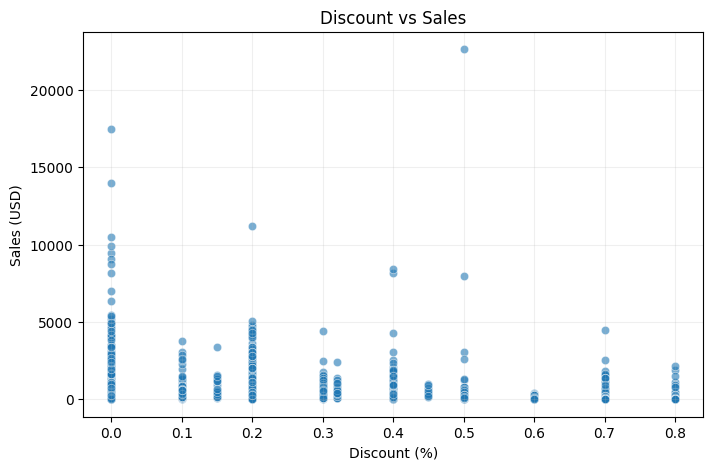

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=sales, x='Discount', y='Sales', alpha=0.6, color='tab:blue')
plt.title('Discount vs Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Sales (USD)')
plt.grid(alpha=0.2)
plt.show()

**Scatter Plot Discount vs Profit**

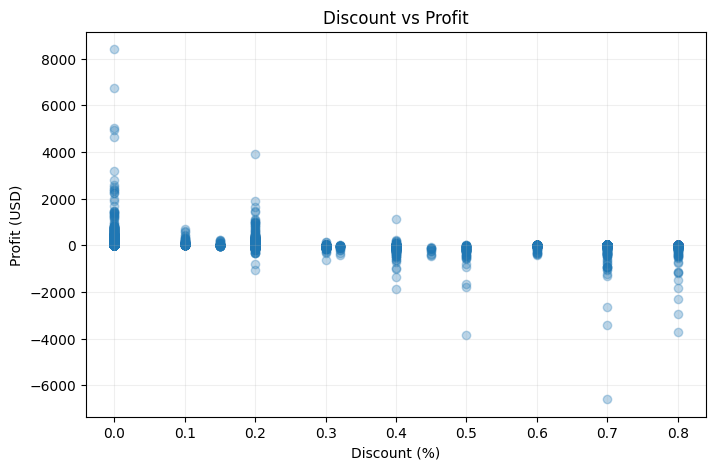

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(sales['Discount'], sales['Profit'], alpha=0.3)
plt.title('Discount vs Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit (USD)')
plt.grid(alpha=0.2)
plt.show()

In [67]:
# Normality Test using Shapiro-Wilk Test
# Null Hypothesis (H0): The data is normally distributed.
for col in ['Discount','Sales','Profit','Profit Margin']:
    stat, p = shapiro(sales[col])
    if p > 0.05:
        print(f"{col}: p-value = {p:.4f} (Accept H0 - Data is normally distributed)")
    else:
        print(f"{col}: p-value = {p:.4f} (Reject H0 - Data is not normally distributed)")

Discount: p-value = 0.0000 (Reject H0 - Data is not normally distributed)
Sales: p-value = 0.0000 (Reject H0 - Data is not normally distributed)
Profit: p-value = 0.0000 (Reject H0 - Data is not normally distributed)
Profit Margin: p-value = 0.0000 (Reject H0 - Data is not normally distributed)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9994.
  res = hypotest_fun_out(*samples, **kwds)


**Binning Discounts**

In [68]:
bins = [0, 0.1, 0.2, 0.5, 1.0]  # 5 bin edges = 4 categories
labels = ['Low < 10%', 'Medium 10%-20%', 'Relatively High 20%-50%', 'High >50%']  # bins - 1 = 4 labels
sales['Disc_Level'] = pd.cut(sales['Discount'],
                        bins=bins,
                        labels=labels,
                        include_lowest=True)

sales[['Discount', 'Profit', 'Disc_Level']]

,Discount,Profit,Disc_Level
Row ID,,,
1,0.00,41.91,Low < 10%
2,0.00,219.58,Low < 10%
3,0.00,6.87,Low < 10%
4,0.45,-383.03,Relatively High 20%-50%
5,0.20,2.52,Medium 10%-20%
...,...,...,...
9990,0.20,4.10,Medium 10%-20%
9991,0.00,15.63,Low < 10%
9992,0.20,19.39,Medium 10%-20%


**Discount Summary**

In [69]:
disc_sum = sales.groupby('Disc_Level').agg(
    avg_sales = ('Sales', 'mean'),
    avg_profit = ('Profit', 'mean'),
    total_sales = ('Sales', 'sum'),
    total_profit = ('Profit', 'sum'),
    avg_qty = ('Quantity', 'mean'),
    c_trans = ('Profit', 'count'),
    neg_profit = ('Profit', lambda x: (x<0).mean())
).reset_index()


disc_sum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8180\3786623172.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disc_sum = sales.groupby('Disc_Level').agg(


,Disc_Level,avg_sales,avg_profit,total_sales,total_profit,avg_qty,c_trans,neg_profit
0,Low < 10%,233.499135,67.460388,1142277.77,330016.22,3.810303,4892,0.000818
1,Medium 10%-20%,213.575845,24.738905,792152.81,91756.60,3.736317,3709,0.139930
2,Relatively High 20%-50%,555.943128,-109.529143,298541.46,-58817.15,3.772812,537,0.916201
3,High >50%,75.033423,-89.438236,64228.61,-76559.13,3.912383,856,1.000000


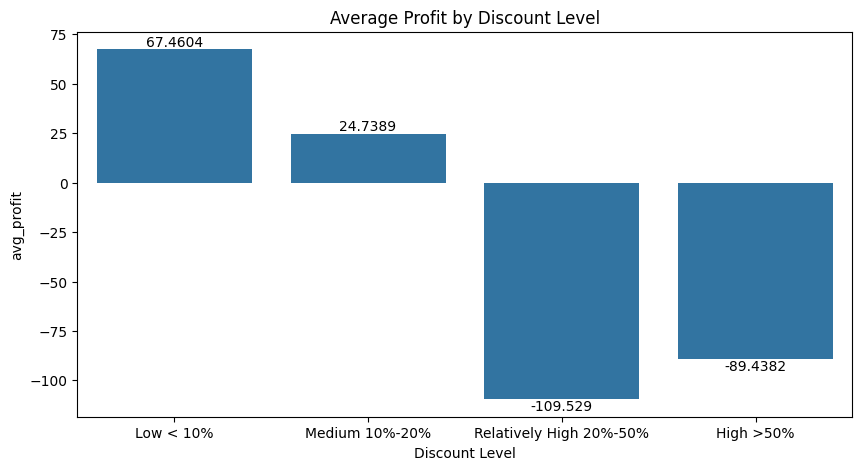

In [70]:
# Visualize
plt.figure(figsize=(10,5))
bar_plot= sns.barplot(data=disc_sum, x='Disc_Level', y='avg_profit')
for i in bar_plot.containers:
    bar_plot.bar_label(i)
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount Level')
plt.show()

**Correlation Test**

In [71]:
sales[['Discount', 'Sales', 'Profit', 'Profit Margin']].corr(method='spearman')

,Discount,Sales,Profit,Profit Margin
Discount,1.000000,-0.056971,-0.543340,-0.645167
Sales,-0.056971,1.000000,0.518415,-0.199199
Profit,-0.543340,0.518415,1.000000,0.500777
Profit Margin,-0.645167,-0.199199,0.500777,1.000000


**CONCLUSION**

From the analysis, it’s clear that discounts don’t automatically lead to higher sales.
The scatter plot between discount and sales shows that most transactions happen at lower discount levels (under 20%), and even when discounts rise above 30–40%, there’s no consistent increase in sales value.
This means customers’ buying decisions aren’t really driven by how big the discount is. Big discounts might catch attention, but they don’t always turn into bigger sales.

When we look at the relationship between discount and profit, the impact is way more obvious.
As the discount percentage increases, profit drops sharply, and many transactions even turn negative once the discount goes beyond 20–30%.
This is also clear from the binned discount summary: profits become negative in the 20–50% discount range, and get even worse when discounts go above 50%.

The Spearman correlation test supports this result — it shows a very weak correlation between discount and sales, but a strong negative one between discount and profit.
In short, as discounts increase, profitability keeps going down even though sales don’t really go up.

Overall, this dataset shows diminishing returns from discounts:
**small discounts help boost sales a little without hurting profits**, but once discounts pass around 20–30%, the financial impact turns negative. This means the company needs a more balanced pricing strategy, one that still keeps products competitive but also protects profit.

#### **5.3 Time Series Analysis**  
- How have sales and profit changed over the past four years?  
- Which year has the highest performance?  

In [72]:
# Extract Year

sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Year'] = sales['Order Date'].dt.year

# Yearly Performance
yearly = (sales.groupby('Year').agg(
    total_sales = ('Sales', 'sum'),
    total_profit = ('Profit', 'sum')
).reset_index())

# Yearly Profit Margin
yearly['yearly_margin'] = yearly['total_profit'] / yearly['total_sales'] * 100

yearly

,Year,total_sales,total_profit,yearly_margin
0,2020,484247.47,49543.86,10.231104
1,2021,470532.39,61618.44,13.095473
2,2022,608473.96,81726.66,13.431415
3,2023,733946.83,93507.58,12.740375


**Visualisation**

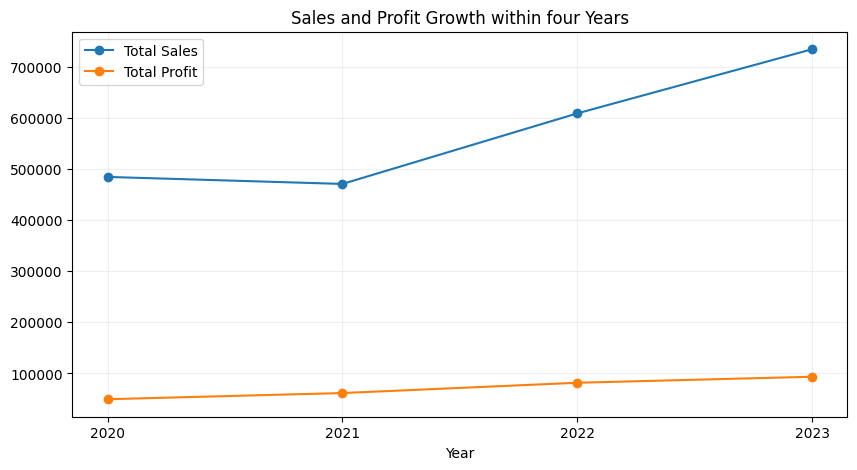

In [73]:
plt.figure(figsize=(10,5))
plt.plot(yearly['Year'], yearly['total_sales'], marker='o', label='Total Sales')
plt.plot(yearly['Year'], yearly['total_profit'], marker='o', label='Total Profit')
plt.title('Sales and Profit Growth within four Years')
plt.xlabel('Year')
plt.xticks(yearly['Year'].astype(int))
plt.legend()
plt.grid(alpha=0.2)
plt.show()

**Conclusion**

From 2020 to 2023, both sales and profit steadily increased, showing consistent business growth. Sales rose from $484K to $733K, while profit doubled from $49K to $93K.

In 2021, sales slightly dropped but profit and margin improved to 13.1%, indicating stronger cost control. The peak performance came in 2022, when both sales and profit grew sharply, supported by the highest margin (13.4%).

However, in 2023, although revenue reached its highest level, profit growth slowed and margin slipped to 12.7%, signaling that rising costs or discount pressure started to affect efficiency.

Overall, the company’s growth trend remains positive, but maintaining margin stability will be crucial to sustain profitability as sales continue to expand.

#### **5.4 Country Analysis**  
- Which country show the strongest and weakest financial performance?  
- Country x Discount x Profit

In [74]:
countries = sales.groupby('Country').agg(
    total_sales = ('Sales', 'sum'),
    total_profit = ('Profit', 'sum'),
    avg_discount = ('Discount', 'mean'), 
    avg_profit_margin = ('Profit Margin', 'mean')
).reset_index()

countries

,Country,total_sales,total_profit,avg_discount,avg_profit_margin
0,Argentina,35764.32,9772.90,0.004615,33.528923
1,Australia,80166.11,-12607.94,0.390041,-39.165996
2,Austria,2865.02,1059.59,0.000000,42.195000
3,Belgium,17431.12,-1190.47,0.288710,-5.006210
4,Brazil,76269.61,24463.10,0.007059,33.337216
5,Canada,138641.29,33402.64,0.064032,27.634368
6,Chile,35281.94,-3427.89,0.303571,-6.638259
7,China,23705.52,7031.17,0.005714,34.375905
8,Colombia,8481.71,1769.07,0.000000,31.761429
9,Costa Rica,7464.93,2037.09,0.000000,32.841316


In [75]:
weakest = countries.sort_values(by='avg_profit_margin').reset_index(drop=True).head(5)
strongest = countries.sort_values(by='avg_profit_margin', ascending=False).reset_index(drop=True).head(5)
print('Weakest Countries Performance:')
display(weakest)
print('\nStrongest Countries Performance:')
display(strongest)

Weakest Countries Performance:


,Country,total_sales,total_profit,avg_discount,avg_profit_margin
0,Australia,80166.11,-12607.94,0.390041,-39.165996
1,Japan,170187.91,-25729.32,0.370193,-34.206335
2,Russia,32108.11,-6527.88,0.316484,-12.373791
3,France,116511.98,-15560.06,0.328620,-8.603833
4,Mexico,78258.19,-16971.38,0.324947,-7.378891



Strongest Countries Performance:


,Country,total_sales,total_profit,avg_discount,avg_profit_margin
0,Austria,2865.02,1059.59,0.000000,42.195000
1,United Arab Emirates,11678.13,4008.65,0.000000,37.949333
2,Croatia,1315.56,394.84,0.000000,37.758333
3,Netherlands,10169.11,3017.12,0.022222,37.046222
4,Denmark,1270.53,454.49,0.000000,36.373750


**CONCLUSION**

From the country-level analysis, we can see that countries offering bigger discounts often end up with lower or even negative profit margins. For example, Austria, UAE, and the Netherlands stay profitable with very small discounts, while Australia, Japan, and France show losses even though they give large discounts. This means that giving discounts doesn’t always help increase sales or performance — in many cases, it actually reduces profit if it doesn’t match customer behavior or market conditions.

This pattern is also supported by global research, which shows that heavy discounting usually cuts into profits because the extra sales volume rarely makes up for the smaller margin. Markets with stronger demand and higher value perception, like Austria and the UAE, can perform well without large discounts. But in markets where people are more price-sensitive or have lower income levels, companies rely more on discounts just to attract buyers — which ends up hurting profitability.

Overall, this shows that **the company needs to adjust its pricing and discount strategy based on customer behavior and income levels in each country**. Instead of using one global discount rule, pricing should reflect how much customers in each market value the product and how much they are able —and willing  to pay. By doing that, the company can protect its profit margins while still staying competitive in different regions.

#### **5.5 Customer Segment Analysis**   
- Which customer segments contribute the most to sales and profit?  

In [76]:
# Tabel
segment = sales.groupby('Segment').agg(
    total_sales = ('Sales', 'sum'),
    total_profit = ('Profit', 'sum'),
).reset_index()

segment['Profit Margin'] = segment['total_profit'] / segment['total_sales'] * 100
segment.sort_values(by='total_profit', ascending=False).reset_index(drop=True)

,Segment,total_sales,total_profit,Profit Margin
0,SMB,1161401.12,134118.64,11.548003
1,Strategic,706146.32,91979.13,13.025506
2,Enterprise,429653.21,60298.77,14.034288


**Visualisation**

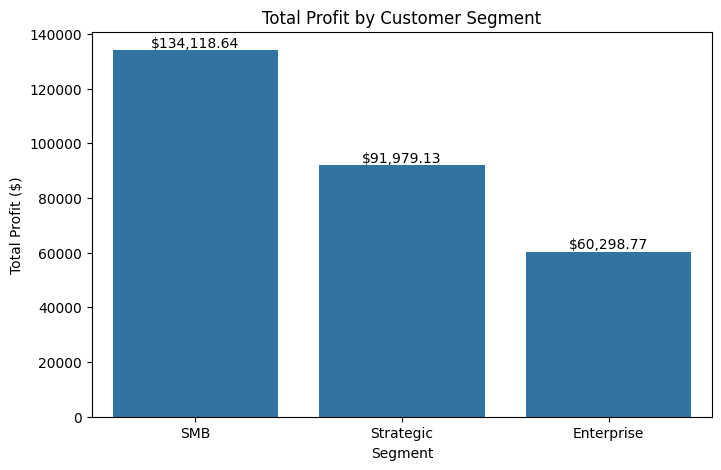

In [77]:
plt.figure(figsize=(8,5))
bar_plot =sns.barplot(data=segment.sort_values('total_profit', ascending=False),
            x='Segment', y='total_profit')
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt=currency)  # Format with commas and 2 decimal places
plt.title('Total Profit by Customer Segment')
plt.ylabel('Total Profit ($)')
plt.show()

**CONCLUSION**

From the segment performance analysis, SMB (Small and Medium Business) emerges as the largest profit contributor, generating around $134K in total profit and over $1.16M in total sales, despite having a slightly lower profit margin of 11.5%. This indicates that while each transaction yields a modest return, the high transaction volume within the SMB segment makes it the backbone of the company’s revenue stream.

The Strategic segment follows with $91K profit and a 13% margin, showing that although its scale is smaller than SMB, it maintains healthy efficiency. These customers likely represent loyal or long-term accounts with stable engagement and lower churn risk, making them valuable for consistent cash flow.

Meanwhile, the Enterprise segment records the lowest total profit ($60K) but actually has the highest margin (14%). This pattern suggests that even though Enterprise deals are fewer, they bring better returns per transaction — potentially due to customized contracts, premium pricing, or reduced discounting. However, the lower overall volume means this segment is currently under-optimized from a growth perspective.

Across all segments, the profit margins are relatively close, ranging between 11–14%, implying that no segment is performing poorly in efficiency, but the distribution of sales and customer base drives the total profit differences.

#### **5.6 Negative Profit Check**   
- How many transactions result in negative profit, and why does it occur?   
- Does discount was the reason or is there any other reasons behind it?  

In [78]:
# Negative Profit Check
# Filter transactions with negative profit
neg_df = sales[sales['Profit'] < 0]

#
neg_count = len(neg_df)
total_count = len(sales)
neg_rate = (neg_count / total_count) * 100

# summary table
summary = pd.DataFrame({
    'Total Transactions': [total_count],
    'Negative Profit Transactions': [neg_count],
    'Percentage (%)': [round(neg_rate, 2)]
})

summary

,Total Transactions,Negative Profit Transactions,Percentage (%)
0,9994,1871,18.72


**Profit Correlation**

In [79]:
num_corr = sales.corr(numeric_only=True)['Profit'].sort_values(ascending=False)
num_corr

Profit           1.000000
Sales            0.479065
Profit Margin    0.223725
Quantity         0.066253
Year             0.004618
Date Key         0.004609
Discount        -0.219487
Name: Profit, dtype: float64

**CONCLUSION**

Out of 9,994 total transactions, around 1,871 (18.72%) resulted in negative profit, meaning nearly one in five transactions caused a financial loss.

Based on the correlation analysis, Sales shows a moderate positive relationship with Profit (0.48), which makes sense — higher sales usually mean higher profit. However, Discount has a weak negative correlation (-0.21), indicating that while discounting contributes to losses, it’s not the only factor. The relatively low correlation strength suggests other operational or pricing variables may also be driving negative profit.

Interestingly, Profit Margin and Quantity have positive but small correlations, implying that some products with high sales volume still operate under low margins — likely due to pricing inefficiency or cost structure (for example, production cost, logistics, or product bundling strategies that lower per-unit gain).

#### **5.7 High Discount Transaction Analysis**    
- What is the impact of transactions with discounts greater than 50%?

This section focuses on transactions where discounts exceed 50% to assess their impact on sales and profitability.

In [80]:
# Filter High Discount Transactions
high_disc = sales[sales['Discount'] > 0.5]

# High Discount Transaction Summary
high_disc_summary = pd.DataFrame({
    'Total Transactions': [len(high_disc)],
    'Total Sales': [high_disc['Sales'].sum()],
    'Total Profit': [high_disc['Profit'].sum()],
    'Average Profit Margin (%)': [round((high_disc['Profit'].sum() / high_disc['Sales'].sum()) * 100, 2)]
})

high_disc_summary

,Total Transactions,Total Sales,Total Profit,Average Profit Margin (%)
0,856,64228.61,-76559.13,-119.2


**CONCLUSION**

Transactions with discounts above 50% make up a small portion of total sales (856 out of 9,994) yet contribute to significant losses — generating around $64K in sales but resulting in $76K in losses, with an average margin of –119%.  

This means every dollar earned from these high-discount sales actually costs the company more than a dollar in profit loss.
The data clearly shows that excessive discounts not only fail to drive meaningful sales but also severely harm overall profitability.

To prevent further profit erosion, the company should limit discounts to a maximum threshold of 20-30% depending on product type and customer segment.
Instead of relying on deep discounts to boost sales, focus on value-driven pricing strategies — such as bundling, limited-time offers, or loyalty-based discounts that maintain perceived value while protecting margins. Products that only sell under heavy discounts may also need repositioning or price restructuring to ensure long-term sustainability.

# **6. Overall Summary**

AWS SaaS sales performance continues to grow over the last four years, but profitability remains inconsistent. The analysis from both Tableau and Jupyter confirms that this imbalance mainly stems from inefficient discount practices, uneven market performance, and product margin differences.

From a product standpoint, high sales volume doesn’t guarantee high profitability.
While ContactMatcher recorded the highest total sales, Support and SaaS Connector Pack – Gold consistently delivered stronger profit margins. This indicates that AWS SaaS should prioritize margin efficiency over pure transaction volume.

Discount analysis clearly supports this. From both tools, transactions with discounts beyond 30% begin to erode profit, and discounts above 50% result in severe losses, with an average profit margin of –119%. Although smaller discounts (below 20%) still encourage sales, they fail to increase profit proportionally, suggesting that discounting beyond a reasonable range is financially harmful.

Regionally, the findings differ slightly between Tableau and Jupyter. Both agree that Austria, UAE, and the Netherlands maintain strong profit margins with minimal discounts, while countries such as Australia, Japan, and France record frequent losses due to aggressive pricing strategies. These results emphasize the need for localized discount policies — since customer price sensitivity and brand perception vary by region.

Customer segmentation analysis from both datasets also aligns: SMB clients generate the highest total profit ($134K), followed by Strategic ($91K) and Enterprise ($60K) customers.
Despite smaller average transaction values, SMB customers maintain healthier margins, proving that consistent, recurring sales from this segment contribute more to long-term profitability than large but irregular enterprise transactions.

Lastly, high-discount transactions (>50%) reaffirm the root cause of losses: they generate minimal sales but large negative profit, reducing overall company margin performance.

Overall, the data demonstrates that AWS SaaS’s negative profit is not caused by weak demand, but rather by uncontrolled discounting and imbalanced pricing strategies.



# **7. Recommendations**

To achieve sustainable profitability, AWS SaaS should:

- Cap discount levels within a max 30% limit, and base discount policies on minimum profit margin thresholds.  
- Promote high-margin products (Support and SaaS Connector Pack – Gold) in marketing, bundling, and cross-selling campaigns.  
- Localize pricing and discounts according to market behavior and income level to prevent unnecessary markdowns in low-sensitivity regions.  
- Leverage SMB customers through loyalty programs, subscription packages, or recurring billing models to secure consistent revenue.  
- Implement profitability dashboards for ongoing monitoring of product, regional, and segment-level performance — ensuring future decisions remain data-driven.  

**Key Takeaway**

AWS SaaS can sustain its growth only by shifting focus from sales expansion to profit optimization. The path forward lies in controlling discounts, emphasizing margin efficiency, and aligning regional strategies, ensuring that every dollar earned contributes meaningfully to long-term profitability.